In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
df=pd.read_csv("data.csv")
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [49]:
df.isnull().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [50]:
x=df.iloc[:,1:]
df_norm=(x-x.mean())/x.std()
df_norm.head()


,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [51]:
#sns.pairplot(df_norm[["date","age","distance","stores","latitude","longitude","price"]],diag_kind="kde")

In [52]:
#To convert into normal original labels
y_mean=df['price'].mean()
y_std=df['price'].std();
def convert_label_value(pred):
    return int(pred*y_std+y_mean)


In [53]:
x=df_norm.iloc[:,:6]
x.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [54]:
y=df_norm.iloc[:,-1:]
y.head()

,price
0,0.350088
1,-1.836486
2,-0.339584
3,-1.839425
4,0.245266


In [55]:
x_arr=x.values
y_arr=y.values
x_arr.shape,y_arr.shape

((5000, 6), (5000, 1))

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_arr,y_arr,test_size=0.05,random_state=0)

In [57]:
def get_model():
    model=Sequential([
        Dense(10,input_shape=(6,),activation='relu'),
        Dense(20,activation='relu'),
        Dense(5,activation='relu'),
        Dense(1)
    ])
    model.compile(loss='mse',optimizer='adam')
    return model;
get_model().summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_17 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [58]:
#dummy model for checking best among all activation fuctions
def get_model2():
    model=Sequential([
        Dense(10,input_shape=(6,),activation='sigmoid'),
          Dense(20,activation='sigmoid'),
        Dense(5,activation='tanh'),
        Dense(1)
    ])
    model.compile(loss='mse',optimizer='adam')
    return model;
get_model2().summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_21 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [66]:
es_cb=EarlyStopping(monitor='val_loss',patience=5)
model=get_model()
preds_on_untrained=model.predict(x_test)
history=model.fit(x_train,y_train,validation_data=(x_test,y_test)
                 ,epochs=50,callbacks=[es_cb])

Epoch 1/50
149/149 [==============================] - 0s 1ms/step - loss: 0.7287 - val_loss: 0.4713
Epoch 2/50
149/149 [==============================] - 0s 821us/step - loss: 0.3079 - val_loss: 0.2394
Epoch 3/50
149/149 [==============================] - 0s 966us/step - loss: 0.2002 - val_loss: 0.1795
Epoch 4/50
149/149 [==============================] - 0s 972us/step - loss: 0.1765 - val_loss: 0.1662
Epoch 5/50
149/149 [==============================] - 0s 939us/step - loss: 0.1700 - val_loss: 0.1598
Epoch 6/50
149/149 [==============================] - 0s 911us/step - loss: 0.1656 - val_loss: 0.1559
Epoch 7/50
149/149 [==============================] - 0s 950us/step - loss: 0.1629 - val_loss: 0.1559
Epoch 8/50
149/149 [==============================] - 0s 893us/step - loss: 0.1608 - val_loss: 0.1593
Epoch 9/50
149/149 [==============================] - 0s 862us/step - loss: 0.1599 - val_loss: 0.1560
Epoch 10/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1588 - 

In [60]:
def plot_loss(history):
    h = history.history
    x = len(h['loss'])
    x_lim=[i for i in range(x)]
    plt.figure(figsize=(8, 8))
    plt.plot(x_lim, h['val_loss'], label = 'Validation Loss')
    plt.plot(x_lim, h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

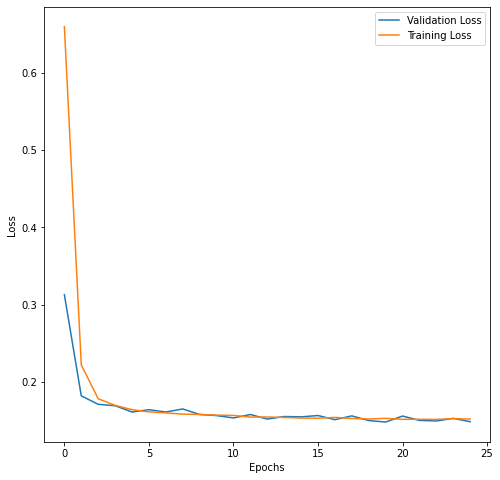

In [61]:
plot_loss(history)

In [62]:
def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test,'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max],'b--')
    plt.legend()
    plt.show()
    return

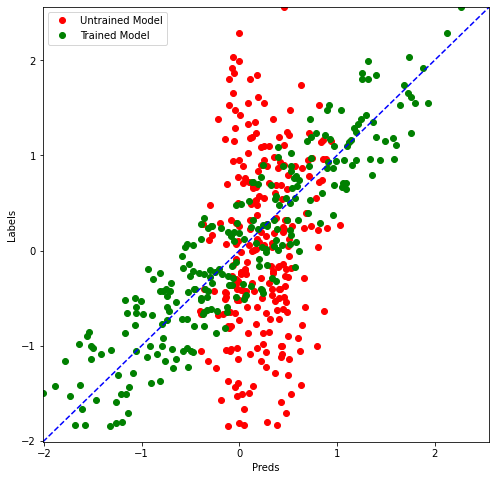

In [63]:
preds_on_trained=model.predict(x_test)
compare_predictions(preds_on_untrained,preds_on_trained,y_test)


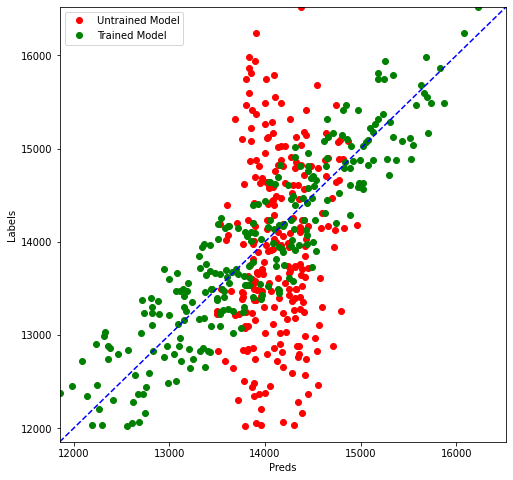

In [64]:
price_untrained=[convert_label_value(y) for y in preds_on_untrained]
price_trained=[convert_label_value(y) for y in preds_on_trained]
price_test=[convert_label_value(y) for y in y_test]
compare_predictions(price_untrained,price_trained,price_test)


In [65]:
rscore=r2_score(price_test,price_trained)
rscore

0.8278999411541792